## Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods Final week  

### Downloading all important packages for starting data extraction and processing.

In [6]:
from bs4 import BeautifulSoup
import requests
import lxml
import pandas as pd
import numpy as np
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 
import matplotlib
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



### Data analysis will be based on five different parts.
##### 1. Download and check of previously caved data frames
##### 2. General overview of the data
##### 3. Comparison of the spatial data 
##### 4. Data analysis of the postoces and venues 
##### 5. Clustering and making predictions

### 1) Download and check of previously caved data frames

#### Donloading postcode and geospatial dataframe:

In [3]:
df_L_P_G = pd.read_csv('London_postcodes_geo.csv') # loading .csv file earlier manufactured in Week 1 Balttle of the Neighbourhoods
df_L_P_G['lat']= df_L_P_G['latitude']              # unifing the names of the columns
df_L_P_G

,Unnamed: 0,postcode,Coverage,Local autority area,latitude,longitude,lat
0,0,E1,"Tower Hamlets, Hackney, City of London","Eastern head district: Aldgate (part), Bishops...",51.51766,-0.05841,51.51766
1,1,E1W,Tower Hamlets,"Wapping, St Katharine Docks, Stepney (part), S...",51.50775,-0.05739,51.50775
2,2,E2,"Tower Hamlets, Hackney","Bethnal Green district: Bethnal Green, Haggers...",51.52939,-0.06080,51.52939
3,3,E3,"Tower Hamlets, Newham","Bow district: Bow, Bow Common, Bromley-by-Bow,...",51.52789,-0.02482,51.52789
4,4,E4,"Waltham Forest, Enfield, Epping Forest (Essex)","Chingford district: Chingford, Sewardstone, Hi...",51.62196,-0.00339,51.62196
...,...,...,...,...,...,...,...
181,181,N18,Enfield,"Upper Edmonton district: Upper Edmonton, Edmon...",51.61309,-0.06446,51.61309
182,182,N19,"Islington, Camden","Upper Holloway district: Upper Holloway, Archw...",51.56464,-0.12712,51.56464
183,183,N20,Barnet,"Whetstone district: Whetstone, Totteridge, Oak...",51.62923,-0.17359,51.62923
184,184,N21,Enfield,"Winchmore Hill district: Winchmore Hill, Bush ...",51.63612,-0.09816,51.63612


#### Donloading London vegan venues dataframe: 

In [29]:
df = pd.read_csv('London_veg_restaurants.csv') # Data obtained in the Week 1 of Balttle of the Neighbourhoods using Foursquare 
df.columns #checking names of th ecolumns to decide which would end up in th efinal dataframe

Index(['Unnamed: 0', 'name', 'categories', 'address', 'lat', 'lng',
       'labeledLatLngs', 'distance', 'postalCode', 'cc', 'city', 'state',
       'country', 'formattedAddress', 'neighborhood', 'crossStreet', 'id'],
      dtype='object')

#### Creating a London dataframe with only chosen columns:

In [30]:
df_Lv = df[['name', 'categories', 'address', 'lat', 'lng', 'distance', 'postalCode',  'id']]
df_Lv .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        50 non-null     object 
 1   categories  50 non-null     object 
 2   address     34 non-null     object 
 3   lat         50 non-null     float64
 4   lng         50 non-null     float64
 5   distance    50 non-null     int64  
 6   postalCode  42 non-null     object 
 7   id          50 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.2+ KB


#### Quick visualization of the London Venues data 

In [31]:
df_Lv.head() 

,name,categories,address,lat,lng,distance,postalCode,id
0,Vegan Yes,Vegetarian / Vegan Restaurant,64 Brick Ln,51.518734,-0.071483,4093,E1 6QL,59ada1f8febf314589c6f8d5
1,Vegan Burgers by Mooshies,Vegetarian / Vegan Restaurant,104 Brick Ln,51.519731,-0.071783,4109,E1 6RL,5848791af68d8d38cfcf6446
2,Soho Vegan Market,Vegetarian / Vegan Restaurant,Rupert Street,51.512285,-0.133766,696,W1D 7PP,5ad1edfe3ba7671c3ec4b6f8
3,Vegan Sweet Tooth,Food Truck,NaN,51.520467,-0.072473,4092,NaN,5437b093498e11e3771b4a2c
4,Korean BBQ & Vegan Restaurant,Korean Restaurant,5 Mile End Road,51.519983,-0.056017,5158,E1 4TP,5c2b803618d43b002ce1aae0


#### 

#### 2)  General overview of the data

#### Calculating the average distance of the venues from the city centre (51.5073219 -0.1276474):

In [32]:
print ('Average distance from the center of London is', df_Lv['distance'].mean(), 'meters.')

Average distance from the center of London is 5420.0 meters.


#### Overview of the venues labelled differently than Vegetarian / Vegan Restaurant:

In [33]:
for i in df_Lv ['categories']:
    if i != 'Vegetarian / Vegan Restaurant':
        print(i) 

Food Truck
Korean Restaurant
Donut Shop
Food Stand
Building
School
Bakery
Café
Tea Room
Food Truck
Bakery
Farmers Market
Fried Chicken Joint
Market
Organic Grocery
Grocery Store


#### Investigating unknown 'Building' named location:

In [34]:
df_Lv.loc[df_Lv['categories'] == 'Building']

,name,categories,address,lat,lng,distance,postalCode,id
15,London Vegetarian and Vegan School,Building,NaN,51.498638,-0.083737,3192,NaN,57b9ad1a498ec3e4b51e80b1


#### Making sure if there is no duplicates with another Vegetarian and Vegan School

In [35]:
df_Lv.loc[df_Lv['categories'] == 'School']

,name,categories,address,lat,lng,distance,postalCode,id
16,London Vegetarian and Vegan School,School,217 Long Lane,51.498461,-0.083773,3196,SE1 4PA,57b97dfc498e955a180e90e2


#### As the id and latitude and longitude are not matching I will include them both into the statistics. 

Calculating the number of the actual vegan restaurants in the dataset:

In [36]:
l = [i for i in df_Lv ['categories'] if i == 'Vegetarian / Vegan Restaurant' or i == 'Korean Restaurant']
print('Number of the actual vegan restaurants is', len(l))

Number of the actual vegan restaurants is 35


#### 

### 3) Comparison of the spatial data

#### Connecting with Foursquare:

In [37]:
CLIENT_ID = 'YXW00NB**************DX4' # your Foursquare ID
CLIENT_SECRET = '0PPAXMI***********QZYZOA' # your Foursquare Secret
VERSION = '20180604'

#### Getting London geospatial information with use of Foursquare:

In [39]:
address = 'London'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Latitude of London:',latitude,'Longitue of London', longitude)

Latitude of London: 51.5073219 Longitue of London: -0.1276474


#### Visualisation of the London venues data on a diagram:

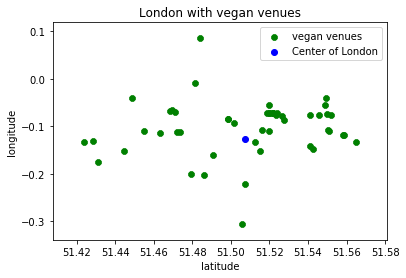

In [42]:
plt.scatter(df_Lv['lat'], df_Lv['lng'], label="vegan venues", color="green", marker="8")
plt.scatter(latitude, longitude,label="Center of London", color='blue', marker="o")
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('London with vegan venues')
plt.legend()
plt.show()

#### Visualising the venues on the map:

In [49]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=12) # generate map centred around London


# add the Vegan restaurants as green circle markers
for lat, lng, label in zip(df_Lv.lat, df_Lv.lng, df_Lv.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### 4)  Data analysis of the postoces and venues

#### Next step will require data from both datasets. To marge them outcodes of the post codes are needed. There is no function that will be able to do that so new funcion have to be defined. New function will extract first part of the post code until the space leaving rest behind.

In [83]:
def extract_postcode_1(postcode):  # defining operating on postcode
    try: 
        space_index = postcode.index(' ') # defining space as ' '
        start = 0                         # definiing starting point within the object
        end = space_index                 # defining space as a cutout 
        first_postcode = postcode[start:end] # length of the function
    except: 
        first_postcode = postcode            # acknowledging the name
    return first_postcode

#### Extracting the out postcodes from the London Vegan Venues data:

In [84]:
df_Lv['postcode'] = df_Lv['postalCode'].apply(lambda x: extract_postcode_1(str(x)))
print(df_Lv[['postcode', 'postalCode']] )

   postcode postalCode
0        E1     E1 6QL
1        E1     E1 6RL
2       W1D    W1D 7PP
3       nan        NaN
4        E1     E1 4TP
5       W14    W14 9NU
6       W1U    W1U 1BW
7         E      E C1N
8       SE1    SE1 4JU
9        E1         E1
10       N1     N1 6DP
11      nan        NaN
12       E1     E1 6GY
13      nan        NaN
14      Nw1    Nw1 3ad
15      nan        NaN
16      SE1    SE1 4PA
17      SW9        SW9
18       E1     E1 6SB
19       N7     N7 6AG
20     SE15   SE15 4UJ
21      N16        N16
22       E1     E1 6RU
23       E2     E2 7JP
24       E1     E1 6RU
25       E5     E5 0LH
26      NW1    NW1 8AH
27     SW17   SW17 0LT
28       N7     N7 8JE
29     SW16   SW16 6LG
30       N7     N7 8DJ
31     SW16   SW16 6JF
32       E8         E8
33      nan        NaN
34       E8     E8 4AH
35       E8     E8 1FT
36     SE15   SE15 5BY
37      nan        NaN
38       N7     N7 6AG
39      SW6    SW6 5PU
40       E8     E8 2LP
41      SW2    SW2 1QB
42     SE15

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### After creating outcodes Vegan venues dataframe can be join with London Geospatial data. Type of join: Left join to include only relevent data:

In [85]:
df1= pd.merge(df_Lv, df_L_P_G, on = 'postcode', how = 'left')  # Joining two datarames 
df1.drop(labels = ['Unnamed: 0'], axis = 1)                    # cleaning up data

,name,categories,address,lat_x,lng,distance,postalCode,id,postcode,Coverage,Local autority area,latitude,longitude,lat_y
0,Vegan Yes,Vegetarian / Vegan Restaurant,64 Brick Ln,51.518734,-0.071483,4093,E1 6QL,59ada1f8febf314589c6f8d5,E1,"Tower Hamlets, Hackney, City of London","Eastern head district: Aldgate (part), Bishops...",51.51766,-0.05841,51.51766
1,Vegan Burgers by Mooshies,Vegetarian / Vegan Restaurant,104 Brick Ln,51.519731,-0.071783,4109,E1 6RL,5848791af68d8d38cfcf6446,E1,"Tower Hamlets, Hackney, City of London","Eastern head district: Aldgate (part), Bishops...",51.51766,-0.05841,51.51766
2,Soho Vegan Market,Vegetarian / Vegan Restaurant,Rupert Street,51.512285,-0.133766,696,W1D 7PP,5ad1edfe3ba7671c3ec4b6f8,W1D,Westminster,"Soho (south east); Chinatown, Soho Square",51.51344,-0.13066,51.51344
3,Vegan Sweet Tooth,Food Truck,NaN,51.520467,-0.072473,4092,NaN,5437b093498e11e3771b4a2c,nan,NaN,NaN,NaN,NaN,NaN
4,Korean BBQ & Vegan Restaurant,Korean Restaurant,5 Mile End Road,51.519983,-0.056017,5158,E1 4TP,5c2b803618d43b002ce1aae0,E1,"Tower Hamlets, Hackney, City of London","Eastern head district: Aldgate (part), Bishops...",51.51766,-0.05841,51.51766
5,222 Veggie Vegan,Vegetarian / Vegan Restaurant,222 North End Rd,51.486076,-0.202802,5720,W14 9NU,4bd2ccb39854d13aa352fc4d,W14,"Hammersmith and Fulham, Kensington and Chelsea","West Kensington district: West Kensington, Ken...",51.49488,-0.20923,51.49488
6,Vegan Crosstown Doughnuts,Donut Shop,5-6 Picton Pl,51.515354,-0.151135,1856,W1U 1BW,5aaf8519e2d4aa7dd23b9325,W1U,Westminster,Marylebone,51.51827,-0.15209,51.51827
7,Astro Vegan,Food Stand,NaN,51.519875,-0.109297,1889,E C1N,596364a48194fc32008e3118,E,NaN,NaN,NaN,NaN,NaN
8,Y Vegan,Vegetarian / Vegan Restaurant,Tabard Street,51.501471,-0.092695,2507,SE1 4JU,5ad875bf4c954c4c42939667,SE1,"Lambeth, Southwark, City of London","South Eastern head district: Bankside, South B...",51.49838,-0.08949,51.49838
9,Vegan Nights London,Vegetarian / Vegan Restaurant,NaN,51.521603,-0.071401,4208,E1,59cd593f91eaca3d8eaa4f52,E1,"Tower Hamlets, Hackney, City of London","Eastern head district: Aldgate (part), Bishops...",51.51766,-0.05841,51.51766


#### Calculating how many venues are in a particular postcode area in London:

In [87]:
c_postc = df_Lv.groupby(['postcode']).count()                     # grouping data by postcode and summarizing venues in each of the postcodes
c_postc = c_postc.reset_index()
c_postc = c_postc.drop(labels = ['categories', 'address', 'lat', 'lng', 'distance', 'postalCode', 'id'], axis = 1) # removing repetition
c_postc['count']= c_postc['name']
c_postc = c_postc[['postcode', 'count']]
c_postc = c_postc[c_postc['postcode'] != 'nan']                   # droping non available data

#### Vegan venues in a particular postcode area in London - visualization 

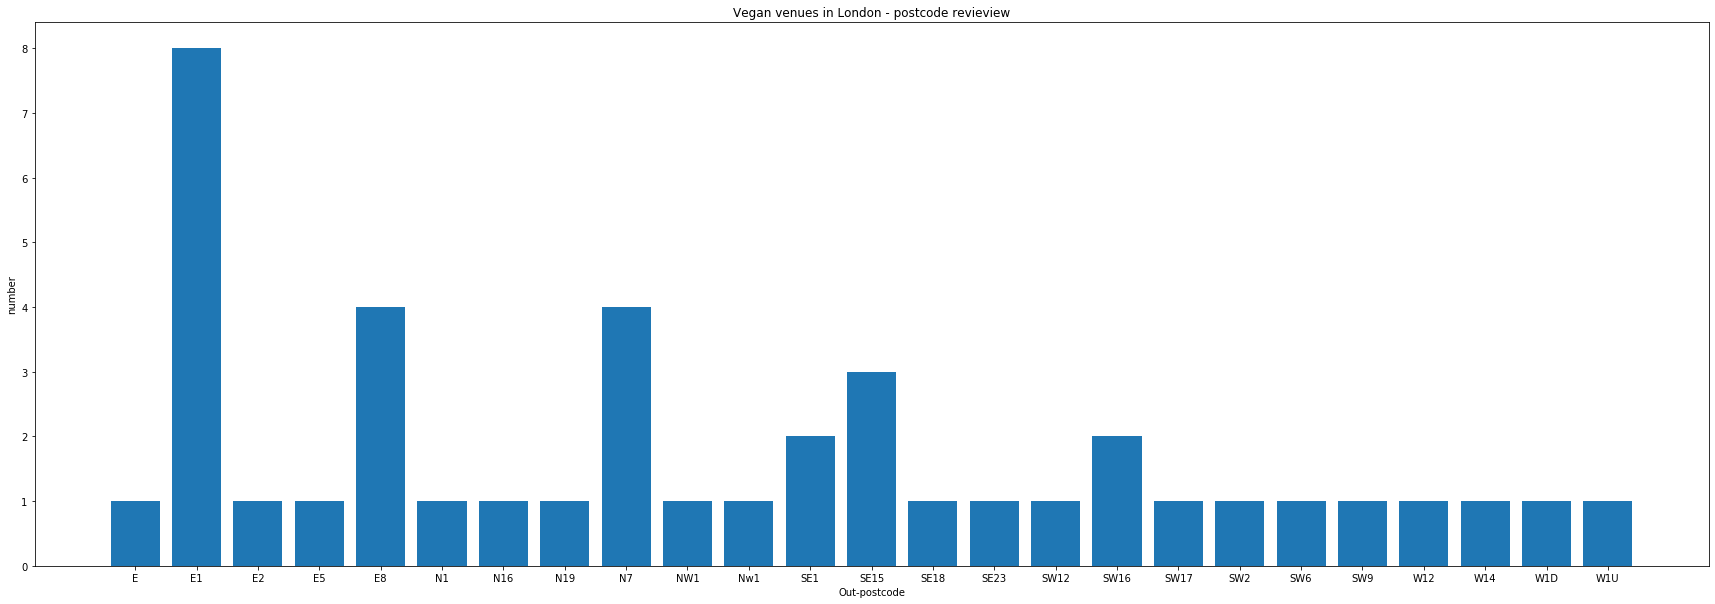

In [91]:
fig1, ax=plt.subplots(figsize=(30,10))
ax.bar(c_postc['postcode'], height = c_postc['count'])
plt.xlabel('Out-postcode')
plt.ylabel('number')
plt.title('Vegan venues in London - postcode revieview')
fig1.show()

### 5) Clustering and making predictions:

#### Clustering the data with use KMeans:

In [51]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_Lv[['lat', 'lng']])  # partition the dataset into Kpre-defined distinct non-overlapping subgroups
centroids =  kmeans.cluster_centers_                                      # defining centres of the cluster cluster
labels = kmeans.labels_                                                   # defining labels  
uniquelabels = list(set(labels))
print(centroids)                                                          # location of the clusters

[[ 5.15321571e+01 -8.79046922e-02]
 [ 5.14947253e+01 -2.32237648e-01]
 [ 5.14646413e+01 -1.35032647e-01]
 [ 5.14706915e+01 -2.80629717e-02]]


#### Visualisation of KMeans of London Vegan Venues:

#### Data was divided into 4 parts to see if it connects with Cardinal directions (East, South, West and North). 

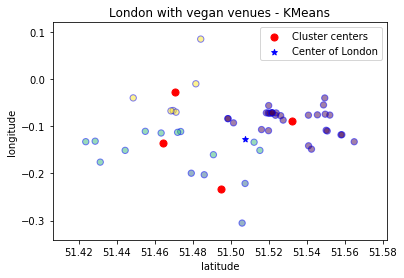

In [78]:
fig, ax = plt.subplots()
ax.scatter(df_Lv['lat'], df_Lv['lng'], c= kmeans.labels_.astype(float), s=40, alpha=0.5, marker= "o", edgecolor = ['b'])
ax.scatter(centroids[:, 0], centroids[:, 1], label="Cluster centers", c='red', s=50)
ax.scatter(latitude, longitude,label='Center of London', color='blue', marker="*")
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('London with vegan venues - KMeans')
ax.legend()

fig.show()

#### Testing the data: 

#### To test the data new vegan venue was introduced. It's name is Biff's Jack Shack (51.5518° N, 0.0752° W):

In [79]:
lng_B = 0.0752
lat_B = 51.5518

#### Predicting in which cluster new restaurant would be placed:

In [80]:
kmeans.predict([[lat_B, lng_B]])

array([3], dtype=int32)

#### Array 3 is the array that Biff's Jack Shack was assighn to.

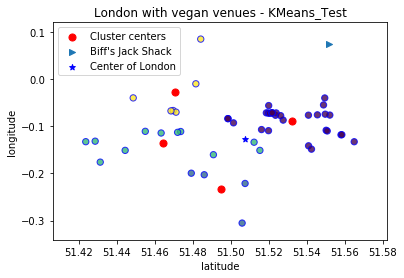

In [93]:
plt.scatter(df_Lv['lat'], df_Lv['lng'], c= kmeans.labels_.astype(float),  s=40, alpha=0.8, marker= "o", edgecolor = ['b'])
plt.scatter(centroids[:, 0], centroids[:, 1], label="Cluster centers", c='red', s=50)
plt.scatter(lat_B, lng_B,label="Biff's Jack Shack", marker=">")
plt.scatter(latitude, longitude,label="Center of London", color='blue', marker="*")
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('London with vegan venues - KMeans_Test')
plt.legend()

plt.show()

#### As seen on the diagram above Biff's Jack Shack was assighn to a cluster 3 that is in colour purple.